In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
import warnings
warnings.filterwarnings('ignore')

In [75]:
edges=[(0,4),(4,0),(0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),
        (1,5),(5,1),(2,5),(5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]

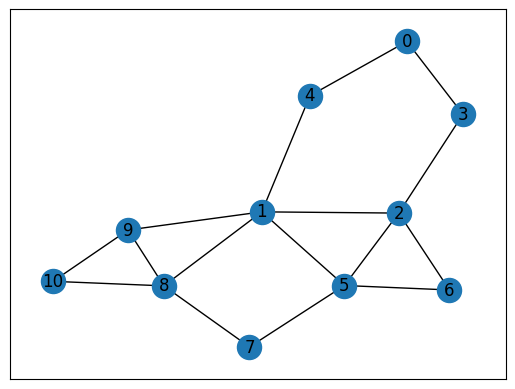

In [76]:
G=nx.Graph()
G.add_edges_from(edges)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [77]:
Reward=np.matrix(np.zeros(shape=(11,11)))  # No of nodes=11(node 0 to node 10) ,Matrix size =11*11
print(Reward)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [78]:
for i in G[10]:              # Notice only we can reach node 10 from node 8 and node 9
    Reward[i,10]=100         # Set all rewards to 0 except the actions arriving at node 10.
print(Reward)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [79]:
Q_Table=np.matrix(np.zeros(shape=(11,11)))  # initially Q_Table is empty
print(Q_Table)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [80]:
Q_Table-=100  #To eliminate impossible actions, their Q-values are set to -100,
              #it is not possible to go directly from 2 to 10. Therefore its Q-value is set as -100
              

In [81]:
for node in G.nodes:
    for i in G[node]:
        Q_Table[node,i]=0
        Q_Table[i,node]=0
print(Q_Table)

[[-100. -100. -100.    0.    0. -100. -100. -100. -100. -100. -100.]
 [-100. -100.    0. -100.    0.    0. -100. -100.    0.    0. -100.]
 [-100.    0. -100.    0. -100.    0.    0. -100. -100. -100. -100.]
 [   0. -100.    0. -100. -100. -100. -100. -100. -100. -100. -100.]
 [   0.    0. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
 [-100.    0.    0. -100. -100. -100.    0.    0. -100. -100. -100.]
 [-100. -100.    0. -100. -100.    0. -100. -100. -100. -100. -100.]
 [-100. -100. -100. -100. -100.    0. -100. -100.    0. -100. -100.]
 [-100.    0. -100. -100. -100. -100. -100.    0. -100.    0.    0.]
 [-100.    0. -100. -100. -100. -100. -100. -100.    0. -100.    0.]
 [-100. -100. -100. -100. -100. -100. -100. -100.    0.    0. -100.]]


In [82]:
pd.DataFrame(Reward)
print(Reward)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [83]:
pd.DataFrame(Q_Table)
print(Q_Table)

[[-100. -100. -100.    0.    0. -100. -100. -100. -100. -100. -100.]
 [-100. -100.    0. -100.    0.    0. -100. -100.    0.    0. -100.]
 [-100.    0. -100.    0. -100.    0.    0. -100. -100. -100. -100.]
 [   0. -100.    0. -100. -100. -100. -100. -100. -100. -100. -100.]
 [   0.    0. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
 [-100.    0.    0. -100. -100. -100.    0.    0. -100. -100. -100.]
 [-100. -100.    0. -100. -100.    0. -100. -100. -100. -100. -100.]
 [-100. -100. -100. -100. -100.    0. -100. -100.    0. -100. -100.]
 [-100.    0. -100. -100. -100. -100. -100.    0. -100.    0.    0.]
 [-100.    0. -100. -100. -100. -100. -100. -100.    0. -100.    0.]
 [-100. -100. -100. -100. -100. -100. -100. -100.    0.    0. -100.]]


In [84]:
# define a function which takes a starting node and returns the next node. 
#It also accepts an exploration rate(epsilon) for random exploration. 
#Otherwise, it chooses an action according to the highest Q value of the possible actions.

def next_node_num(source_node,epsilon):
    random_val=random.uniform(0,1)
    if random_val<epsilon:
        sample=G[source_node]
    else:
        sample=np.where(Q_Table[source_node,]==np.max(Q_Table[source_node,]))[1]
    next_node=int(np.random.choice(sample,1))
    return next_node

In [85]:
# update Q_table

def update_Q_Table(node_1,node_2,learning_rate,discount):
    max_index=np.where(Q_Table[node_2,]==np.max(Q_Table[node_2,]))[1]
    if max_index.shape[0]>1:
        max_index=int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value=Q_Table[node_2,max_index]
    Q_Table[node_1,node_2]=int((1-learning_rate)* Q_Table[node_1,node_2]+learning_rate*(Reward[node_1,node_2]+discount*max_value))

In [86]:
def learning(epsilon,learning_rate,discount):
    for i in range(5000):
        source_node=np.random.randint(0,11)
        next_node=next_node_num(source_node,epsilon)
        update_Q_Table(source_node,next_node,learning_rate,discount)
learning(0.5,0.5,0.5)

In [87]:
pd.DataFrame(Q_Table)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,6.0,14.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,14.0,-100.0,14.0,14.0,-100.0,-100.0,64.0,64.0,-100.0
2,-100.0,31.0,-100.0,6.0,-100.0,14.0,6.0,-100.0,-100.0,-100.0,-100.0
3,6.0,-100.0,14.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,6.0,31.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,31.0,14.0,-100.0,-100.0,-100.0,6.0,31.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,14.0,-100.0,-100.0,14.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,14.0,-100.0,-100.0,64.0,-100.0,-100.0
8,-100.0,31.0,-100.0,-100.0,-100.0,-100.0,-100.0,31.0,-100.0,64.0,131.0
9,-100.0,31.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,64.0,-100.0,131.0


In [88]:
def find_shortest_path(source,destination):
    path=[source]
    next_node=np.argmax(Q_Table[source,])
    path.append(next_node)
    while next_node!=destination:
        next_node=np.argmax(Q_Table[next_node,])
        path.append(next_node)
    return path

In [89]:
find_shortest_path(0,10)

[0, 4, 1, 8, 10]

In [90]:
find_shortest_path(5,10)

[5, 1, 8, 10]

In [91]:
find_shortest_path(1,10)

[1, 8, 10]